# Ford GoBike System Data Exploration
## by Sooyeon Won 

## Preliminary Wrangling


> - This analysis analyses the patterns of mobility, based on the rental bike dataset. The data from 'Ford GoBike System' contains time and place information of each trip since 2017. For this analysis, I used the data collected in 2018 and 2019, since they include all datapoints from January to December.

> - Originally, there are monthly seperated datasets. Instead of using all 24 datasets, I joined the monthly datasets in each year (Please, refer to '01_data_wrangling.ipynb'), and loaded the 2018 and 2019 datasets in this notebook. Then I appended each other for the sake of simplicity. The final dataset contains more than 4 million datapoints. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [2]:
# load in the datasets into a pandas dataframe, print statistics
bike_2018 =  pd.read_csv('bike_2018.csv')
bike_2019 =  pd.read_csv('bike_2019.csv')

C:\Users\wonso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bike_2018['Year'] = '2018' # Labeling each dataset before joining.
bike_2019['Year'] = '2019'
bike_df = bike_2018.append(bike_2019, ignore_index=True)

In [4]:
bike_2018.info(), bike_2019.info() 
# Only one column ('rental_access_method') is contained in 2019 dataset. The rest of features are all the same.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  Year                     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 213.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------               

(None, None)

In [5]:
bike_df.shape

(4370704, 16)

In [6]:
bike_df.info() # using .info(), we can figure out what kinds of information does the whole joined dataset contains. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370704 entries, 0 to 4370703
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  Year                     object 
 15  rental_access_method     object 
dtypes: float64(6), int64(2), object(8)
memory usage: 533.5+ MB


In [7]:
# I adjusted the datatype of several features as follows; 
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

# Drop unnecessary features in this analysis 
unnecessary_cols = ['start_station_id', 'end_station_id', 'bike_id', 'end_station_name', 'start_station_name']
bike_df.drop(unnecessary_cols, axis = 1, inplace = True)

In [8]:
print('The earliest date of datapoints: ', bike_df['start_time'].min())
print('The latest date of datapoints: ', bike_df['start_time'].max())
print('Total numbere of datapoints: ', bike_df.shape[0])
# More than 4.3 million datapoints are gathered from 2018-01-01 to 2019-12-31.

The earliest date of datapoints:  2018-01-01 00:01:53.847000
The latest date of datapoints:  2019-12-31 23:59:41
Total numbere of datapoints:  4370704


### The Structure of the Final Dateset 

> The final dataset contains approximately 4.37 million mobility records and 16 features. <br>
  The datapoints are collected from 2018-01-01 to 2019-12-31. 
  
### The Main Features of Interest in Dateset

> The 16 features can be classified into 4 categories: 
- **Time information**: Riding Duration(in secs), Start and End time, Year
- **Place information**: Start station (ID, Name, Latitude, Longitude), End station (ID, Name, Latitude, Longitude)
- **User information**: User types, Completeness of trips (bike_share_for_all_trip), Access Type(rental_access_method)
- **Other information**: Bike ID
    
> The features about user information are all categorical. 
- **user_types**: 'Subscriber', 'Customer' indicate multi-times, one-time users, respectively. 
- **bike_share_for_all_trip**: True or False 
- **rental_access_method**: via Apps or via Clipper (This feature is contained in 2019 dataset only.) 

> The columns unnecessary for this analysis are dropped before exploration. The unuseful columns are station IDs, and names, and Bike IDs.

### The Main Topics of Investigation with Supporting Features 

> Using this data, I mainly focus on the movement patterns of rental bike users. I also compare the patterns based on the user types. 
More specifically, I tried to find answers for the following questions through out this analysis.: 

1. General Patterns
> - **How long do individual trips take? (duration of trips) <br>**
    The support features: Riding Duration, Year
> - **How far do the users ride a bike? (distance of trips) <br>** 
    The support features: The Latitude, Longitude of Start and End station
> - **When are most trips taken in terms of time of day, day of the week, or month of the year? <br>**
    The support features: Start and End time
   
2. User-Type Pattern Comparisons 
> - **How many times did the different types of user rent a bike? <br>**
    The support features: User types    
> - **How do the different types of users, access to the rental system? <br>**
    The support features: User types, rental_access_method

3. User-Type Pattern Comparisons with various Time Dimensions
> - **How different is the average trip duration between subscribers or customers? <br>**
    The support features: Riding Duration, User types
> - **How different are the average trip distances between difference user types?  <br>**
    The support features: The Latitude, Longitude of Start and End station, User type
> - **How different are most trips taken in terms of time of day, day of the week, or month of the year between two user types? <br>**
    The support features: Start and End time, Year

## Univariate Exploration

> To begin with I will look at the overall distribution of trip durations.

### 1. The distribution of trip durations

In [9]:
bike_df.duration_sec.describe() # From the max value, we can guess that there are outliers. 

count    4.370704e+06
mean     8.288215e+02
std      2.152483e+03
min      6.000000e+01
25%      3.550000e+02
50%      5.640000e+02
75%      8.810000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

In [10]:
# Since we have very large dataset, I decided to drop the outliers by taking 99 percentile of the data. 
quantile_99= bike_df.duration_sec.quantile(.99)
quantile_99

4684.0

In [11]:
bike_df= bike_df.query('duration_sec < 4684')

In [12]:
bike_df.duration_sec.describe()

count    4.326994e+06
mean     6.956324e+02
std      5.318051e+02
min      6.000000e+01
25%      3.530000e+02
50%      5.600000e+02
75%      8.670000e+02
max      4.683000e+03
Name: duration_sec, dtype: float64

Text(0.5, 1.0, 'Overall Trip Duration (in second)')

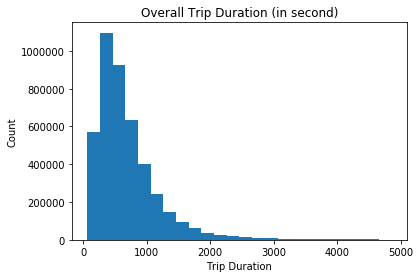

In [13]:
bins_edge =np.arange(60,bike_df['duration_sec'].max()+200, 200)
plt.hist(data = bike_df, x =  'duration_sec', bins = bins_edge );
plt.xlabel('Trip Duration')
plt.ylabel('Count')
plt.title('Overall Trip Duration (in second)')

> The Trip duration histogram is higher skewewd to the right. On average, users use the bikes about 695 seconds (approximately 11.58 minutes). From the description information we can also find out that 75% of users ride a bike less than 897 seconds (approximately 15 minutes). Next, I investgated the distribution of trip distances of each rental bike record.

### 2. The distribution of trip distance

In [14]:
# To calculate the trip distance, I set a function as follow:
import math
def distance_cal(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Reference: "https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows"
    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

        a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [15]:
lat_start = bike_df.start_station_latitude
lon_start = bike_df.start_station_longitude 
lat_end = bike_df.end_station_latitude     
lon_end = bike_df.end_station_longitude

bike_df['distance'] = distance_cal(lat_start, lon_start, lat_end, lon_end)

In [16]:
bike_df.distance.describe()

count    4.326994e+06
mean     1.811059e+00
std      4.478416e+01
min      0.000000e+00
25%      9.022422e-01
50%      1.413548e+00
75%      2.171534e+00
max      1.279835e+04
Name: distance, dtype: float64

In [17]:
# By taking 99 percentile of the data, I dropped outliers.
dist_quantile_99 = bike_df.distance.quantile(.99)
dist_quantile_99

4.9696435862433175

In [18]:
bike_df = bike_df.query('distance < 5')

Text(0.5, 1.0, 'Overall Trip Distiance Duration')

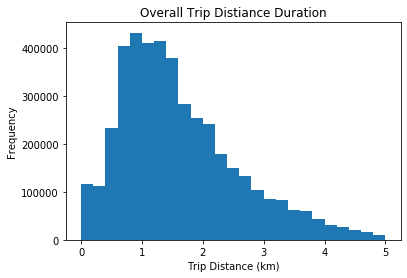

In [19]:
bins_dist =np.arange(0, bike_df['distance'].max()+0.2, 0.2)
plt.hist(data = bike_df, x =  'distance', bins = bins_dist );
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.title('Overall Trip Distiance Duration')

In [20]:
bike_df.distance.describe()

count    4.285150e+06
mean     1.613010e+00
std      9.720560e-01
min      0.000000e+00
25%      8.980624e-01
50%      1.406232e+00
75%      2.144612e+00
max      4.999525e+00
Name: distance, dtype: float64

In [21]:
zero_dist = bike_df.query('distance < 0.1') # A new dataframe wiht zero distance data points
zero_dist.shape[0] / bike_df.shape[0] # Zero distance data points consist of 2.5% of whole users

0.025471920469528488

In [22]:
zero_dist.duration_sec.describe() # Zero distance users do not necessarily mean they did not use the bikes.

count    109151.000000
mean       1241.017407
std        1118.997560
min          60.000000
25%         244.000000
50%         961.000000
75%        1887.000000
max        4683.000000
Name: duration_sec, dtype: float64

> The histogram of the trip distance is also skewed to the right. According to the plot, people ride a bike ca. 1.61km on average. 75 percent of people travel less than 2.14 km. One interesting point of the graph is that there are some people who traveled 0 km, but their trip duration is not zero. This indicates that the users bring back the rented bikes to the station where they started their trip. Then I analysed the distribution of trip records in each year, in each month, in each weekday and each hour.

### 3. The distribution of using bikes in each year /  in each month  /  in each weekday /  in each hour 

#### 3-1 The distribution of using bikes in each year 

Text(0.5, 1.0, 'User Distribution in each Year')

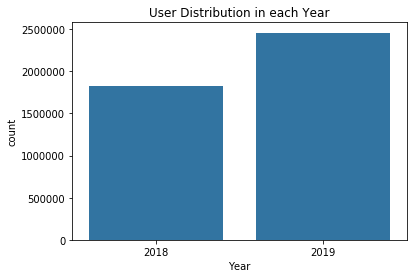

In [23]:
base_color =sns.color_palette()[0]
sns.countplot(data = bike_df, x = 'Year', color = base_color)
plt.ylabel('count')
plt.title('User Distribution in each Year')

#### 3-2 The distribution of using bikes in each month

Text(0.5, 1.0, 'User Distribution in each Month')

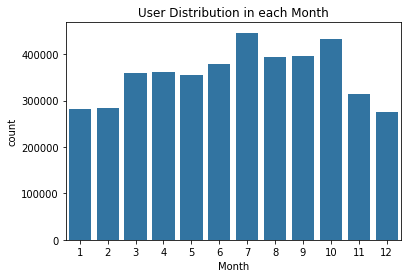

In [24]:
bike_df['Month'] = bike_df['start_time'].dt.month
sns.countplot(data = bike_df, x = 'Month', color = base_color)
plt.title('User Distribution in each Month')

> - Rental bikes are very popular from July to October. On the other hand, less people rent bikes from November to February.

#### 3-3 The distribution of using bikes in each weekday

In [25]:
bike_df['weekday'] = bike_df.start_time.dt.day_name();

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

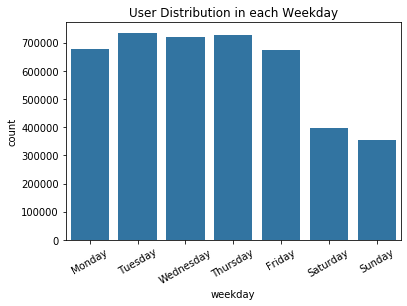

In [26]:
sns.countplot(order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], data = bike_df, x = 'weekday', color = base_color)
plt.title('User Distribution in each Weekday')
plt.xticks(rotation =30)

> It turns out that more rental bikes are taken during weekdays, comparing to weekends.

#### 3-4 The distribution of using bikes in each hour

In [27]:
bike_df['hour'] = bike_df['start_time'].dt.hour # Generate a column 'Hour' extracted from start_time

Text(0.5, 1.0, 'User Distribution in each hour')

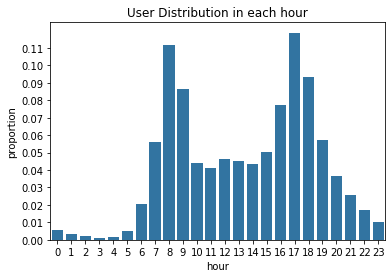

In [28]:
n_points = bike_df.shape[0]
max_count = bike_df.hour.value_counts().max()
max_prop = max_count/n_points 

tick_props = np.arange(0, max_prop, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
#base_color = sb.color_palette()[0]
sns.countplot(data = bike_df, x = 'hour', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.title('User Distribution in each hour')

> As earlier expected, more people use the bike during the rush hours. The histrogram based on each hour is bimodel. From 7:30 to 8:30 and from 16:30 to 17:30 are the two time zones of high demand in a day. So far we have investigated the distribution of users based on time information. Now I analysed the type of users. What percentage of the whole users are subscribers?

### 4. The proportion of user types

Text(0, 0.5, 'proportion')

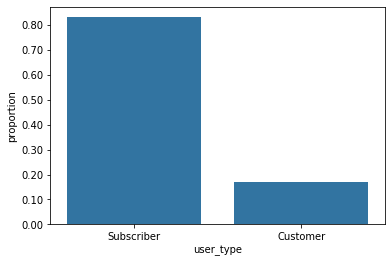

In [29]:
n_points = bike_df.shape[0]
max_count = bike_df.user_type.value_counts().max()
max_prop = max_count/n_points 

tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sns.color_palette()[0]
sns.countplot(data = bike_df, x = 'user_type', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

> It turns out that more than 80% of users are subscribers.

### Discussion about the Distributions of the Features of Interest 

> - First of all, the histrogram of 'Trip Duration' is highly skewed to the right. The majority of people use a rental bike less than 2000 seconds. Is this pattern consistent in both years? We will figure it out in the next section. 
> - To investigate the distribution of 'Trip Distance', I calculated the distance of each trip using latitude and longitude of start and end stations. The histogram of 'Trip Distance' is also skewed to the right. It turns out that most people take a trip with a rental bike around 1,6km on average.
> - Interestingly, there are several data points whose trip distance is calculated zero, but its trip duration is not trivial. This implies that the users bring back the rental bikes to the place where they initially rent it.
> - Comparing to 2018, total number of rental bike usages in 2019 are increased. 
> - More people rent a bike from July to October, rather than from November to February and on weekdays comparing to weekends. 
> - There are two peaks of high demands in a day. People are likely to rent a bike during 7:30 - 8:30 and 16:30 - 17:30. This implies that users prefer to use the rental bikes during rush hours. 


### Several issues of the data.

> **Data Type:** To analyse the distribution of trip frequency within the different time dimensions, I changed the data type of start_time, end_time to datetime, using the to_datetime method of pandas. 
    
> **Outliers:** As mentioned earlier, the columns. 'duration_sec' and 'distance' have several outliers. By taking up to 99 percentile of the datapoints, I removed the outliers. Because our dataset contains a huge amount of data points, removing the 1 percent of whole data points, do not heavily affect to the findings. 

> **Missing Values:** The columns start_station_name/id and end_station_name/id contain missing values. But they are not useful for this analysis.



## Bivariate Exploration

>  In this section, I developed my anaysis in the previous section further. 

- 1. The distribution of trip durations/ trip distance in each year.
- 2. The number of times that different types of users rent a bike in each year.
- 3. The comparison of access methods between the two types of users. 
- 4. The comparison of trip patterns between subscribers and customers in terms of average trip duration and trip distance 
- 5. The relationship between trip duration and trip distance.

In [30]:
# Plotting with whole datapoints takes some time. Thus, I plotted using the sample of bike_df in some cases. 
bike_sample = bike_df.sample(n=2000, random_state=42)

### 1. The distribution of trip durations/ trip distance in each year.

#### 1-1 The distribution of trip durations in each year.

Text(0.5, 1, 'Trip Duration in Each Year (in second)')

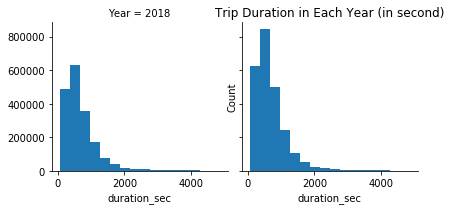

In [31]:
g =sns.FacetGrid(data = bike_df, col = 'Year' )
bins_edges =np.arange(60,bike_df['duration_sec'].max()+300, 300)
g.map(plt.hist, 'duration_sec',bins =bins_edges ); 
plt.ylabel('Count')
plt.title('Trip Duration in Each Year (in second)')

#### 1-2 The distribution of trip distance in each year.

Text(0.5, 1, 'Trip distance in Each Year (in km)')

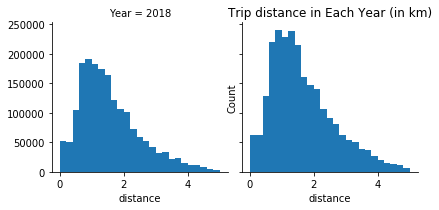

In [32]:
g =sns.FacetGrid(data = bike_df, col = 'Year' )
bins_edges =np.arange(0,bike_df['distance'].max()+0.2, 0.2)
g.map(plt.hist, 'distance',bins =bins_edges ); 
plt.ylabel('Count')
plt.title('Trip distance in Each Year (in km)')

> The distribution of the trip duration/ trip distance in both years are very similar. In both years' plot, the majority of people use the rental bike less than 2000 seconds, ride the bike less than 4 kilometers. From the plots, we can also clearly notice that total number of usages in 2019 is larger than in the previous year. Next, I investigated the number of each user type in both years. 

### 2. The number of times that different types of users rent a bike in each year.

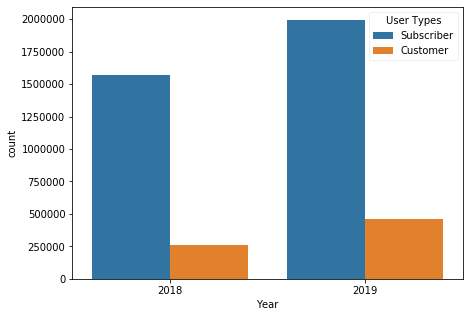

In [33]:
#Compare the Number of Subscribers and Customers in each year.
plt.figure(figsize =[7,5])
ax = sns.countplot(data = bike_df, x = 'Year', hue = 'user_type')
ax.legend(framealpha = 0.3, title ='User Types')

> In both years, the frequency of trips by subscribers is much larger than by customers. This indicates that the subscribers rent a bike more often than usual customers. We can also note that in 2019, subscribers and customers uses the rental bike system more frequently in comparison to the previous year.

### 3. The comparison of access methods between the two types of users. 

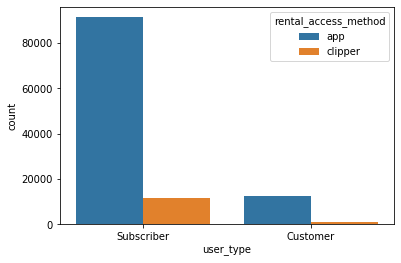

In [34]:
bike_19=bike_df.query('Year == "2019"')
sns.countplot(data = bike_19, x = 'user_type', hue = 'rental_access_method')

> Additionally, I figured out that which methods the subscribers and customers use to rent a bike. This feature is not collected in 2018, so, I only compare between the user types and rental access methods within the 2019 data. <br>
Both types of users access to the system mostly using an app. Thus, the company should carefully pay attention to its application maintenance. 

### 4. The comparison of trip patterns between subscribers and customers in terms of average trip duration and trip distance 

> The average trip duration of customer user type is higher than that of subscriber user type. When we look at the violin plots, we can also find out the data points of subscribers are highly concentrated around the median value.  
> Unlike the duration time feature, there is no huge difference on the average travel distance and distributions between the two groups.

#### 4.1. Trip duration of each user type

In [35]:
bike_df.groupby(['user_type'])['duration_sec'].mean()

user_type
Customer      1007.656554
Subscriber     619.281329
Name: duration_sec, dtype: float64

In [36]:
bike_sample.groupby(['user_type'])['duration_sec'].mean() #The sample represents well its original dataset.

user_type
Customer      1009.763636
Subscriber     615.125749
Name: duration_sec, dtype: float64

Text(0, 0.5, 'Trip Duration (sec)')

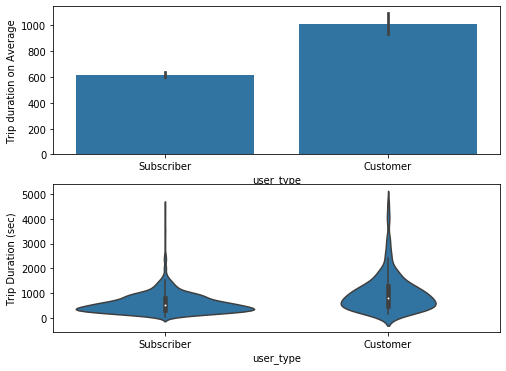

In [37]:
plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
sns.barplot(data = bike_sample, x = 'user_type', y = 'duration_sec',color = base_color)
plt.ylabel('Trip duration on Average')

plt.subplot(2,1,2)
sns.violinplot(data = bike_sample, x = 'user_type', y = 'duration_sec' , color = base_color);
plt.ylabel('Trip Duration (sec)')

#### 4.2.Trip distiance of each user type

Text(0, 0.5, 'Trip Distance (km)')

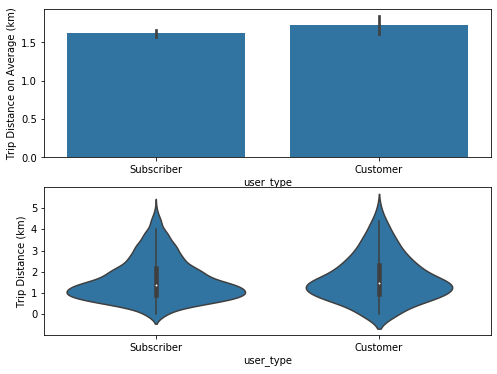

In [38]:
plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
sns.barplot(data = bike_sample, x = 'user_type', y = 'distance', color = base_color);
plt.ylabel('Trip Distance on Average (km)')

plt.subplot(2,1,2)
sns.violinplot(data = bike_sample, x = 'user_type', y = 'distance' , color = base_color);
plt.ylabel('Trip Distance (km)')

### 5. The relationship between duration and distance

> As the last section of bivariate exploration, I investigate the relationship between trip duration and distance. It turns out that travel duration time is positively correlated with travel distance. The correlation coefficient is 0.463.

In [39]:
bike_df[['duration_sec','distance']].describe()

,duration_sec,distance
count,4.285150e+06,4.285150e+06
mean,6.849399e+02,1.613010e+00
std,5.205177e+02,9.720560e-01
min,6.000000e+01,0.000000e+00
25%,3.510000e+02,8.980624e-01
50%,5.550000e+02,1.406232e+00
75%,8.550000e+02,2.144612e+00
max,4.683000e+03,4.999525e+00


Text(0, 0.5, 'Trip Distance (km)')

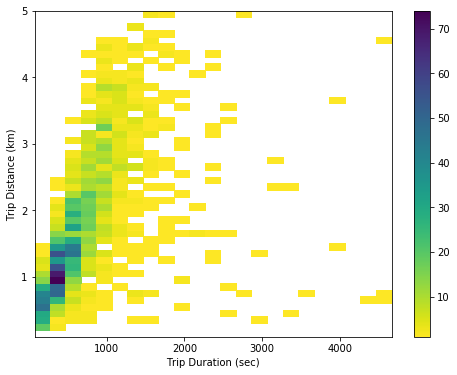

In [40]:
bike_mod = bike_sample.query(' distance> 0.1') 
plt.figure(figsize=[8,6])
bins_dur = np.arange(70, bike_mod.duration_sec.max() + 200, 200)
bins_dis = np.arange(0.1, 5+ 0.1, 0.1)
plt.hist2d(data = bike_mod, x = 'duration_sec', y = 'distance',
           bins = [bins_dur, bins_dis], cmap = 'viridis_r', cmin = 0.3)
plt.colorbar();
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Trip Distance (km)')

In [41]:
corr_= bike_df.duration_sec.corr(bike_df.distance).round(3)
print ('Correlation between trip distance and duration: ', corr_)

Correlation between trip distance and duration:  0.468


### Findings from Bivariate Exploration

> - The distributions of trip durations and trip distance are very similar in each year. We can also noice that in 2019, people rented bikes more often than in 2018. 
> - Almost of all users use the rental bikes less than 2000 seconds (about 33 mintues) and the most of trip distance are short than 4 kilometers. The number of trips that both subscribers and customers rent a bike is increased between the two year. 
> - Also both types of users mostly access to the system using apps, rather than clippers. 
> - The average trip duration of customer user type is higher than that of subscriber user type. When we look at the violin plots, we can also find out the data points of subscribers are highly concentrated around the median value. However, There is no notable difference on trip distance between the two user groups. 
> - Finally, I found out that trip duration is postively correlated with the trip distance in general.   


### Interesting relationships between the other features

> - One interesting finding from the bivariate exploration part is that the subscribers rent a bike more often comparing to the customer group. On the other hand, their average duration trip time is less than the customer group. In other words, although the customer user group use the rental bike system less often, but they use the bike longer period of time than subscribers. 

## Multivariate Exploration

> In this part, I will explore the trip patterns even deeper. How different is the trip patterns of two user types 
1. in each month of the year,
2. in each day of the week, and 
3. in each hour of day

### 1. The comparison of trip patterns between two user groups in each month

#### 1.1 The number of trips

C:\Users\wonso\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


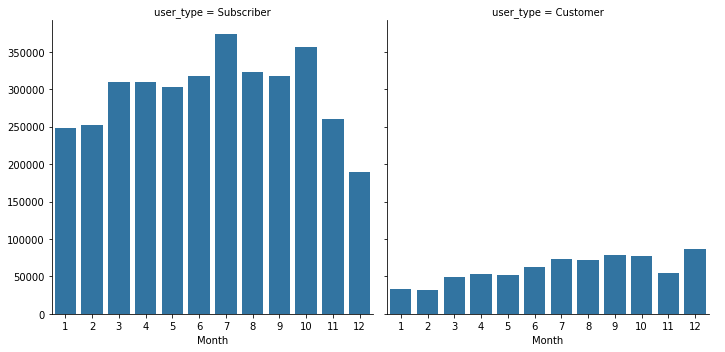

In [42]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
g = g.map(sns.countplot, "Month");
g.add_legend()
plt.show()

#### 1.2 The average trip duration

C:\Users\wonso\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


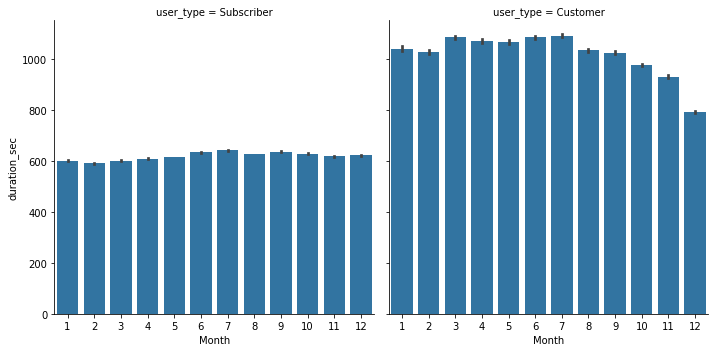

In [43]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
g = g.map(sns.barplot,'Month', 'duration_sec', color = base_color);
g.add_legend()
plt.show()

### 2. The comparison of Trip duration between two user groups  in each day of the week

#### 2.1 The number of trips

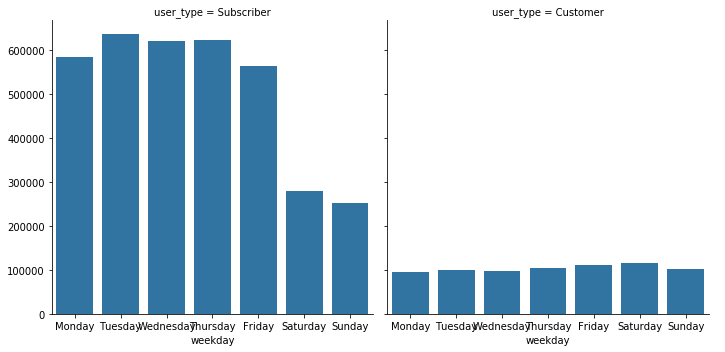

In [44]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
weekday_ord=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = g.map(sns.countplot, "weekday", order = weekday_ord );
g.add_legend()
plt.show()

#### 2.2 The average trip duration

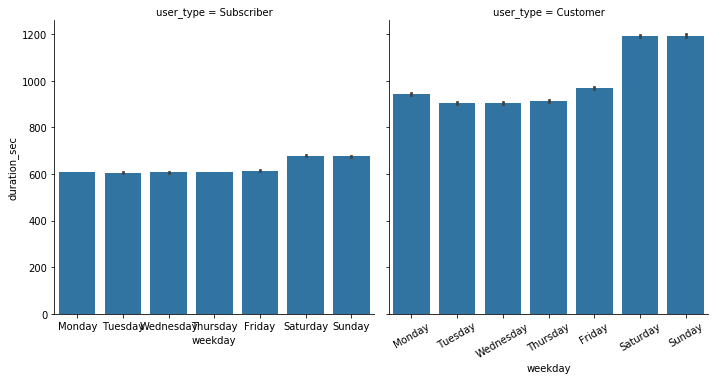

In [45]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
weekday_ord=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = g.map(sns.barplot,'weekday', 'duration_sec', color = base_color, order =weekday_ord);
plt.xticks(rotation = 30)
g.add_legend()
plt.show()

### 3. The comparison of trip patterns between two user groups  in each hour of day.

#### 3.1 The number of trips

C:\Users\wonso\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


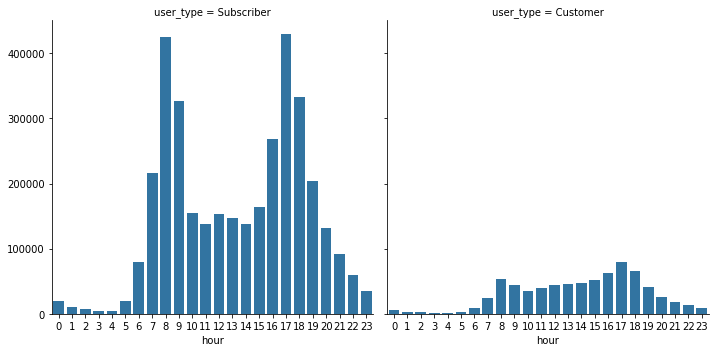

In [46]:
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
g = g.map(sns.countplot, "hour");
g.add_legend()
plt.show()

#### 3.2 The average trip duration

C:\Users\wonso\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x432 with 0 Axes>

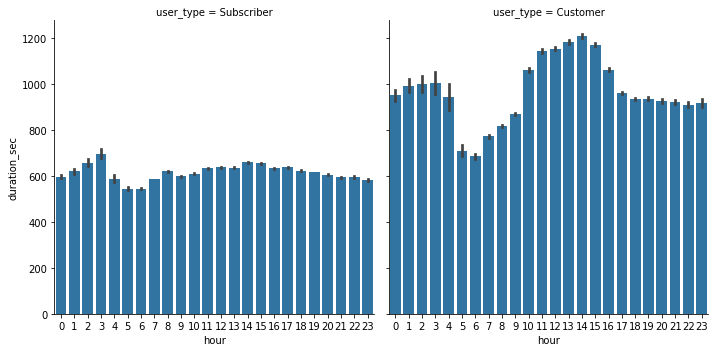

In [47]:
plt.figure(figsize=[10,6])
g = sns.FacetGrid(data = bike_df, col='user_type', height=5)
g = g.map(sns.barplot,'hour', 'duration_sec', color = base_color);
g.add_legend()
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As an extension of the previous analysis I compared the overall patterns of trip between the subscribe and customer groups. In this part,  the patterns are mainly compared within different time dimensions. 

1. **Monthly Analysis:**  The number of trips that subscribe group monthly takes is much more than that of customer group. Also as expected, the average trip duration of subscribers are much less than that of customers. Interestingly, the average trip duration of subscribers are very much similar across the months.  

2. **Weekly Analysis:** The users in subscribe group mostly rent a bike during weekdays. The number of trips on weekends is far less than on weekdays. For these reasons, I guess the most subscribers could be commuters, who rent a bike for a short time to move from one place to another. On the other hand, there is almost no variation on the number of trips in customer groups. As before, the average trip duration of subscribers is less than that of customers. The customers are more likely ride a bike for a longer time on weekends. 

3. **Hourly Analysis:** The subscribers show high demands during the rush hours of day. As we discussed, around 8:00 in the morning and around 17:00 in the afternoon are the peak time zones that subscribers take the rental bikes. On the other hand, customers use the rental bikes in the afternoon rather than in the morning. The trip durations of subscriber group are very similar over the hours. They ride the rental bikss about 600 seconds (ca. 10mins). 

### Were there any interesting or surprising interactions between features?

> The subscribers are more frequently renting the bikes than the customers. On the other hand the trip duration of the subscriber is shorter than that of customers. Also the average duration of the trip for subscribers is about 600 seconds, regardless of time dimensions.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!